# Explore extracting melody
Since Fri. Nov. 23rd, 2021


`music21` has better support on extracting melody, given low-level music note support,
and it seems to work better with Music XML files.



## Setup



In [9]:
import music21 as m21
from icecream import ic

from util import *
from util import MidoUtil as Mu, PrettyMidiUtil as Pmu
from melody_extractor import MxlMelodyExtractor


songs = eg_songs(fmt='MXL')
ic(songs)



ic| songs: ['/Users/stefanh/Documents/UMich/Research/Music with NLP/datasets/MXL-eg/Joe '
            'Hisaishi - Merry Go Round of Life (bitmidi).mxl']


['/Users/stefanh/Documents/UMich/Research/Music with NLP/datasets/MXL-eg/Joe Hisaishi - Merry Go Round of Life (bitmidi).mxl']

## Get the bar with maximum average pitch


### Merry Go Round of Life


In [10]:
fnm = eg_songs(k='Merry Go Round', fmt='MXL')
ic(fnm)
scr = m21.converter.parse(fnm)



ic| fnm: ('/Users/stefanh/Documents/UMich/Research/Music with NLP/datasets/MXL-eg/Joe '
          'Hisaishi - Merry Go Round of Life (bitmidi).mxl')


#### Implementation sanity check
Replace Chords with Notes



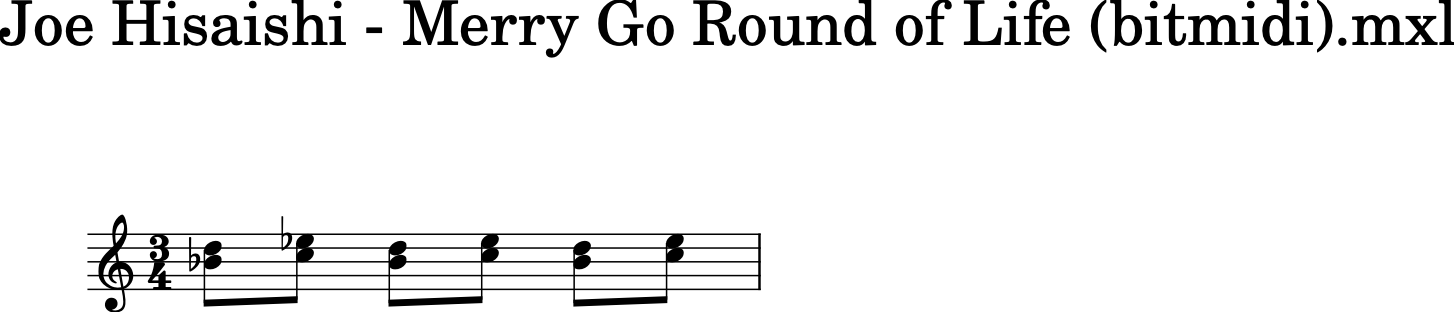

ic| list(bar): [<music21.chord.Chord B-4 D5>,
                <music21.chord.Chord C5 E-5>,
                <music21.chord.Chord B-4 D5>,
                <music21.chord.Chord C5 E-5>,
                <music21.chord.Chord B-4 D5>,
                <music21.chord.Chord C5 E-5>]
ic| [p.octave for p in note.pitches]: [4, 5]
ic| [p.octave for p in note.pitches]: [5, 5]
ic| [p.octave for p in note.pitches]: [4, 5]
ic| [p.octave for p in note.pitches]: [5, 5]
ic| [p.octave for p in note.pitches]: [4, 5]
ic| [p.octave for p in note.pitches]: [5, 5]


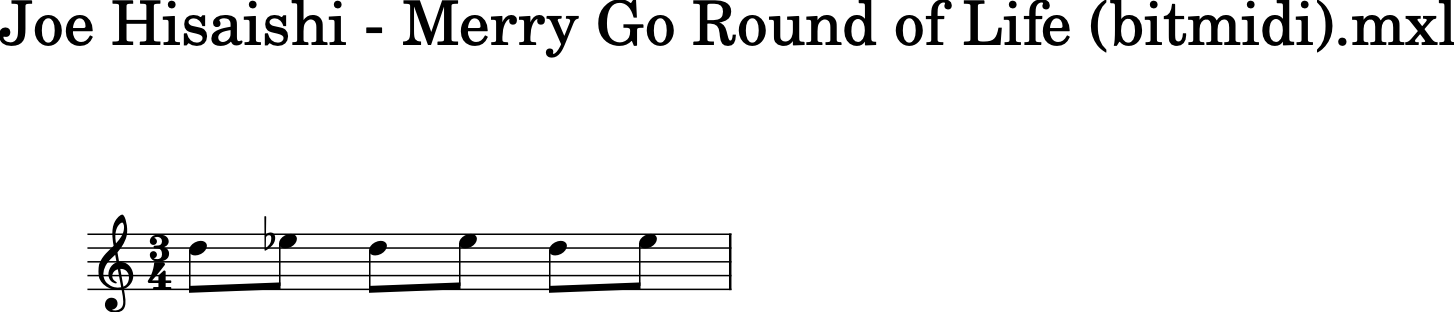

ic| note: <music21.note.Note D>, note.octave: 5
ic| note: <music21.note.Note E->, note.octave: 5
ic| note: <music21.note.Note D>, note.octave: 5
ic| note: <music21.note.Note E->, note.octave: 5
ic| note: <music21.note.Note D>, note.octave: 5
ic| note: <music21.note.Note E->, note.octave: 5


In [11]:
bar = scr.parts[1].measure(2)
bar.show()
ic(list(bar))

for note in bar.notes:
    ic([p.octave for p in note.pitches])
    # ic(note.pitch.octave)
    if isinstance(note, m21.chord.Chord):
        bar.replace(note, max(note.notes, key=lambda n: n.pitch.frequency))

bar.show()
for note in bar:
    ic(note, note.octave)

